# Dossier TD1 (EG:5-6)

## Exercice 1

### Supposez que vous ayez la responsabilité d’un parking en centre\-ville qui ne coûte presque rien en fonctionnement. La demande (inverse) pour $Q$ accès au parking est donnée par : 
### $P = 10 - \frac{1}{4} \cdot Q$

### 1) Combien de personnes seraient prêtes à se garer sur ce parking s’il n’était pas payant ?

In [1]:
# Créons la variable Q
Q, P = var("Q, P")

# Nous pouvons maintenant définir l’équation inverse de demande
D_inv(P, Q) = P == 10 - (1/4)* Q
show(D_inv)
D(Q, P) = solve(D_inv(P, Q), Q)[0]
show(D)



(P, Q) |--> P == -1/4*Q + 10

(Q, P) |--> Q == -4*P + 40

In [2]:
# Nous voulons obtenir la valeur de Q lorsque P est égal à 0.
q_p_0 = solve(D_inv(0, Q), Q)[0].rhs()
q_p_0

40

### 2. Représentez graphiquement la courbe de demande d’accès au parking.

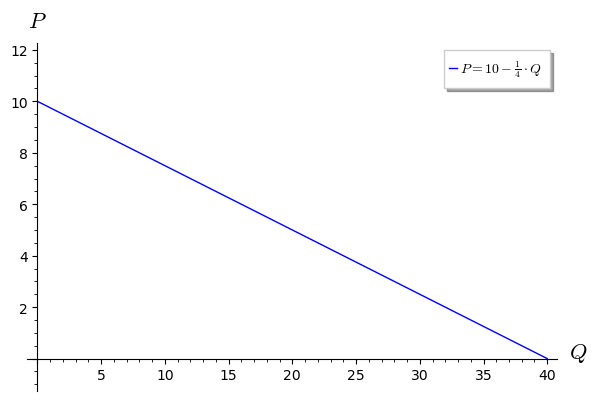

In [3]:
# Nous voulons représenter la courbe de demande dans son ensemble allant de Q = 0 à Q = 40.
plot(D_inv.rhs(), Q, 0, q_p_0, axes_labels = ["$Q$", "$P$"], ymin = -1, ymax = 12, legend_label = r"$P = 10 - \frac{1}{4} \cdot Q$")

### 3. Quelle est la perte de surplus du consommateur associé à un tarif 5€ pour ce parking ?

On commence par déterminer la quantité demandée lorsque le prix est de 5 euros.

In [4]:
# Quantité demandée lorsque P = 5
q_p_5 = solve(D_inv(5, Q), Q)[0].rhs()
q_p_5
print("Lorsque le prix d’accès est de 5 euros, {} places de parkings sont occupées." .format(q_p_5))

Lorsque le prix d’accès est de 5 euros, 20 places de parkings sont occupées.


Pour rappel, le surplus des consommateurs ($CS$) correspond à l’aire comprise entre la courbe de demande et la ligne du prix. Le graphique ci-dessous décompose les différentes aires se situant sous la courbe de demande. Le surplus initial des consommateurs lorsque l’accès au parking est gratuit correspond aux aires $A + B + C$. Le surplus des consommateurs lorsque le prix d’accès au parking passe à 5 euros correspond à l’aire $A$. 

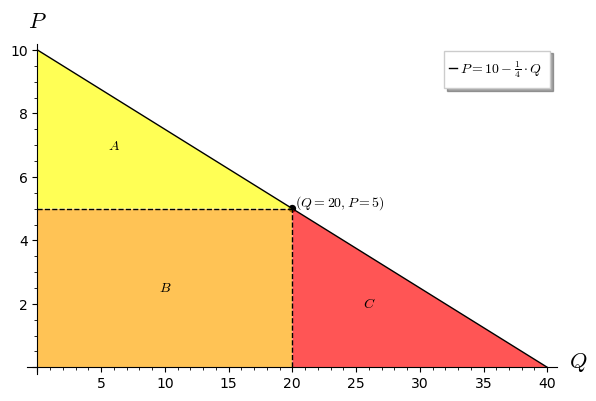

In [5]:
# Représentation graphique de la division des aires sous la courbe de demande

P1 = plot(D_inv.rhs(), Q, 0, q_p_5, axes_labels = ["$Q$", "$P$"], fill = 5, fillcolor = 'yellow', fillalpha = 2/3, xmin = 0, xmax = q_p_0, color = "black", legend_label = r"$P = 10 - \frac{1}{4} \cdot Q$")
P2 = plot(D_inv.rhs(), Q, q_p_5, q_p_0, fill = 0, fillcolor = 'red', fillalpha = 2/3, xmin = 0, xmax = q_p_0, color = "black")
P3 = plot(5, xmin=0, xmax= q_p_5, linestyle='dashed', fill = 0, fillcolor = "orange", fillalpha = 2/3, color = 'black') + line([(q_p_5, 0), (q_p_5, 5)], linestyle = "dashed", color = "black")
P4 = text("$A$", (6, 7), color = "black") + text("$B$", (10, 2.5), color = "black") + text("$C$", (26, 2), color = "black") + text("$(Q = 20, P = 5)$", (23.7, 5.2), color = "black") + point((q_p_5, 5), pointsize = 30, color = "black")
P1 + P2 + P3 + P4

Comme souvent en mathématiques, il  y a plusieurs façons de parvenir au même résultat :

- En constatant que l’aire perdue forme un trapézoide d’aire $A + B$, il nous suffit de calculer l’aire de ce dernier : $A_{trap} = \frac{(a + b) \cdot h}{2}$ où $a$ et $b$ correspondent aux côtés parallèles et $h$ à la distance entre les deux côtés ($5$ ici). 
  Soit $a$ la longueur du côté allant de $(0, 5)$ à $(20, 5)$ et $b$ la longueur du côté allant de $(0, 0)$ à $(40, 0)$. Nous avons alors :

In [6]:
# Calcul de l'aire du trapézoïde contenant l’aire (B + C)
A_trap = ((q_p_0 + q_p_5) * 5)/2
print("La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de {} euros." .format(A_trap))

La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de 150 euros.


- On peut également calculer le surplus du consommateur initial lorsque l’accès au parking est gratuit, correspondant aux aires $A + B + C$ et soustraire le surplus du consommateur lorsque l’accès au parking est fixé à 5 euros. Ce dernier correspond à l’aire du triangle jaune ($A$). Dans ce cas, on peut utiliser la formule donnant l’aire d’un triangle $A_{tri} = \frac{b \cdot h}{2}$ où $b$ correspond à la base du triangle et $h$ à sa hauteur. On obtient ainsi :

In [7]:
# Aire du triangle d'aire A + B + C lorsque P = 0
A_tri_p_0 = ((D_inv(P, 0).rhs() - 0) * q_p_0)/2

# Aire du triangle d'aire A lorsque P = 5
A_tri_p_5 = ((D_inv(P, 0).rhs() - D_inv(P, q_p_5).rhs())* q_p_5)/2

# Calculons maintenant la différence entre les deux aires.
print("La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de {} euros." .format(A_tri_p_0 - A_tri_p_5))

La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de 150 euros.


- On peut également utiliser la force brute en mesurant les aires à partir des intégrales, qui permettent de déterminer l’aire sous une courbe. L’intégrale de la fonction inverse de demande $P = 10 - \frac{1}{4} \cdot Q$ calculée entre $Q = 0$ et $Q = 40$ nous donne l’aire $A + B + C$.
	L’intégrale de la fonction inverse de demande calculée entre $Q = 0$ et $Q = 20$ nous donne quant à elle l’aire $(A + B)$. Pour obtenir l’aire $A$ uniquement, nous devons soustraire l’aire $B$ du résultat obtenu. L’aire $B$ est celle d’un rectangle, avec $A_{rec} = l \cdot L$, où $l$ correspond à la largeur du rectangle et $L$ à sa longueur.
    Nous obtenons donc : $(A + B + C) - ((A + B) - B) = A + B + C - A - B + B = B + C$, c’est-à-dire l’aire correspondant à la perte de surplus des consommateurs.

In [8]:
# Surplus quand P = 0 : intégrale de P(Q) évaluée de Q = 0 à Q = 40 (aire A + B + C)
A_int_p_0 = integrate(D_inv(P, Q).rhs(), (Q, 0, q_p_0))

# Surplus quand P = 5 : intégrale de P(Q) évaluée de Q = 0 à Q = 20 (aire A + B) moins l’aire du rectangle sous la ligne du prix (aire B)
A_int_p_5 = integrate(D_inv(P, Q).rhs(), (Q, 0, q_p_5)) - (D_inv(P, q_p_5).rhs() * q_p_5)

print("La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de {} euros." .format(A_int_p_0 - A_int_p_5))

La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de 150 euros.


Pour votre culture mathématique, l’aire sous la courbe représentant $f(x)$ évaluée sur l’intervalle : $x \in [a, b]$ peut être déterminée par l’intégrale ci-dessous :

$\int_{a}^{b} f(x) \,dx = F(x) \Big|^b_a = F(b) - F(a)$

où $F(x)$ correspond à la fonction primitive de $f(x)$. Ici, nous avons :

$f(x) = 10 - \frac{1}{4} \cdot x$

qui admet pour primitive :

$F(x) = 10 \cdot x - \frac{1}{8} \cdot x^2 + C$,

où $C$ est une constante.

Vous pouvez vérifier que nous avons bien :

$F’(x) = \frac{d F(x)}{d x}$

$ \ \ \  \ \ \ \ \ \ \ \ = 10 - \frac{1}{4} \cdot x$

$ \ \ \ \ \ \  \ \ \ \ \  = f(x)$.

En remplaçant $x$ par $Q$ pour adapter la formule ci-dessus à notre situation, nous pouvons déterminer le surplus des consommateurs $(CS)$ lorsque l’accès au parking est gratuit ($P = 0$ euros) et le nombre de places occupées est de $Q = 40$ : 

$\ \ \ \int_{0}^{40}  \Big(10 - \frac{1}{4} \cdot Q  \Big) \,dQ$ 

$= 10 \cdot Q - \frac{1}{8} \cdot Q^2 + C \Big|^{40}_0$ 

$= (10 \cdot 40 - \frac{1}{8} \cdot 40^2 + C) - [10 \cdot 0 - \frac{1}{8} \cdot 0 + C]$

$= 400 - 200 + C - C $

$= 200$ euros

In [9]:
# Déterminons la primitive de P = 10 - 1/4 * Q
Int(Q) = integral(D_inv(P, Q).rhs(), Q)
show(Int(Q))

-1/8*Q^2 + 10*Q

In [10]:
# Calculons maintenant la différence entre la valeur de la primitive aux extrémités 0 et 40 pour obtenir le surplus des consommateurs :
CS_p_0 = Int(40) - Int(0)
CS_p_0

200

In [11]:
# Pour rappel, le calcul de l’intégrale de notre fonction inverse de demande P = 10 - 1/4 * Q entre 0 et Q = 20 (quantité demandée lorsque P = 5 euros) nous donne l’aire (A + B). Nous voulons donc soustraire l’aire B (un rectangle) pour obtenir le surplus des consommateurs lorsque P = 5. Nous avons déterminé plus tôt que l’aire B est égale à 20 * 5 = 100 euros.
A_rec = 5 * q_p_5
CS_p_5 = (Int(20) - Int(0)) - A_rec
CS_p_5

50

In [12]:
print("La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de {} euros." .format(CS_p_0 - CS_p_5))

La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de 150 euros.


Toujours à l’aide des intégrales, il est possible de déterminer directement l’aire correspondant à la perte de surplus, sans passer par la soustraction de l’aire B.  Pour se faire, voyons ce qui se passe lorsque l’on inverse les axes du graphique.

In [13]:
# Graphique renversé de la courbe de demande
P5 = plot(D.rhs(), P, 0, 5, axes_labels = ["$P$", "$Q$"], fill = 0, fillcolor = 'blue', fillalpha = 2/3, xmin = 0, xmax = 10, color = "black", legend_label = r"$Q = 40 - 4 \cdot P$")
P6 = plot(D.rhs(), P, 5, 10, fill = 0, fillcolor = 'green', fillalpha = 2/3, xmin = 0, xmax = 10, color = "black")
P7 = line([(5, 0), (5, q_p_5)], linestyle = "dashed", color = "black") + line([(0, q_p_5), (5, q_p_5)], linestyle = "dashed", color = "black")
P8 = text("$D$", (2, 18), color = "black") + text("$E$", (6.5, 10), color = "black") + text("$(P = 5, Q = 20)$", (6, 21), color = "black") + point((5, q_p_5), pointsize = 30, color = "black")
P5 + P6 + P7 + P8

Représentée ainsi, la courbe de demande a pour équation $Q = 40 - 4 \cdot P$. 
Le surplus des consommateurs lorsque l’accès au parking est gratuit correspond aux aires $D + E$. Le surplus des consommateurs lorsque le prix passe à P = 5 correspond à l’aire $E$. 
On constate donc que la perte du surplus des consommateurs correspond à l’aire $D$. 
Cette dernière correspond à l’intégrale de la fonction de demande évaluée entre $P = 0$ euros et  $P = 5$ euros.

La primitive de l’équation de demande est :

$40 \cdot P - 2 \cdot P^2 + C$, où $C$ est une contante.

On peut s’en assurer en calculant la dérivée de la primitive puisqu’on obtient alors :

$40 \cdot 1 \cdot P^{(1 - 1)} - 2 \cdot 2 \cdot P^{(2 - 1)} = 40 - 4 \cdot P$.

Mathématiquement, nous avons donc :

$ \ \ \ \int^5_0 Q(P) \ dP $

$= \int^5_0 \ \Big(40 - 4 \cdot P \Big) \ dP$

$ = 40 \cdot P - 2 \cdot P^2 + C \Big|^5_0 $

$= (40 \cdot 5 - 2 \cdot 5^2 + C) - (40 \cdot 0 - 2 \cdot 0^2 + C)$

$= 200 - 50 + C - C$

$= 150$ euros.

In [14]:
# Déterminons la primitive de Q = 40 - 4 * P
Int_D(P) = integral(D(Q, P).rhs(), P)
show(Int_D(P))

-2*P^2 + 40*P

In [15]:
# Calculons maintenant la perte de surplus des consommateurs :
perte_CS = Int_D(5) - Int_D(0)
print("La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de {} euros." .format(perte_CS))

La perte de surplus du consommateur lorsque le prix d’accès au parking passe de 0 euros à 5 euros est de 150 euros.


Les différentes méthodes aboutissent toutes au même résultat. Le surplus du consommateur passe de $200$ € lorsque $P = 0$ € à $50$ € lorsque $P = 5$ €, soit une perte de surplus de $200 - 50 = 150$ €.

### 4. Le directeur du parking envisage de faire passer le droit de passage à 7€. Pour ce prix plus élevé, combien de personnes seront prêtes à utiliser ce parking ? Est-ce que le chiffre d’affaires augmente ou diminue par rapport à un prix de 5€ ? Qu’est-ce que votre réponse vous dit à propos de l’élasticité de la demande ?

In [16]:
# La recette totale est RT = P(Q) * Q
RT_5 = 5 * q_p_5

# Q lorsque P = 7
q_p_7 = solve(D_inv(P, Q).rhs() == 7, Q)[0].rhs()

# Recette totale lorsque P = 7
RT_7 = 7 * q_p_7

# Différence entre les recettes
diff_RT = RT_7 - RT_5

# Impression du résultat.
print("Lorsque P = 5 euros, la quantité demandée est de {} places de parking, pour une recette totale de {} euros." .format(q_p_5, RT_5))
print("Lorsque P = 7 euros, la quantité demandée est de {} places de parking, pour une recette totale de {} euros." .format(q_p_7, RT_7))
print("Il y a donc une perte de recette de {} euros lorsque le prix augmente de 5 euros à 7 euros. La demande est donc élastique par rapport au prix dans cette région de prix." .format(abs(diff_RT)))


Lorsque P = 5 euros, la quantité demandée est de 20 places de parking, pour une recette totale de 100 euros.
Lorsque P = 7 euros, la quantité demandée est de 12 places de parking, pour une recette totale de 84 euros.
Il y a donc une perte de recette de 16 euros lorsque le prix augmente de 5 euros à 7 euros. La demande est donc élastique par rapport au prix dans cette région de prix.


On dit que la demande est élastique par rapport au prix lorsque la valeur absolue de l’élasticité-prix est supérieure à 1. En d’autres termes, lorsque la valeur absolue de l’élasticité est supérieure à 1 ($|\epsilon_P^D| > 1$.

Utilisons SageMath pour étudier l’élasticité-prix de notre courbe de demande dans le détail :

In [17]:
# Formule générale de l’élasticité-prix de la demande lorsque P = 10 - 1/4 * Q
E(Q, P) = (diff(D, P) * P/Q).rhs()
show(E)

(Q, P) |--> -4*P/Q

In [18]:
print("L’élasticité-prix de la demande lorsque P = 5 est de {}. L’élasticité-prix de la demande lorsque P = 7 est de {}." .format(E(q_p_5, 5), E(q_p_7, 7)))

L’élasticité-prix de la demande lorsque P = 5 est de -1. L’élasticité-prix de la demande lorsque P = 7 est de -7/3.


Pour rappel, la valeur absolue de l’élasticité-prix de la demande augmente lorsque l’on remonte le long de la courbe de demande (i.e. lorsque l’on augmente le prix). _A contrario_, elle diminue lorsque l’on descend le long de la courbe de demande. Nous venons de le voir plus haut en faisant passer le prix de 5 euros à 7 euros. 

Étudions maintenant l’élasticité-prix de la demande aux extrémités de la courbe de demande, c’est-à-dire lorsque $P = 0$ et lorsque $Q = 0$. 

In [19]:
# Élasticité-prix de la demande lorsque P = 0
E_p_0 = limit(E(Q, P), P = 0)

# Élasticité-prix de la demande lorsque Q = 0 (nous devons préciser de quel côté nous approchons la limite puisque l’élasticité-prix n’est pas définie au point pour lequel Q = 0, Q étant le dénominateur de la fraction.)
assume(P > 0)
assume(Q >= 0)
E_q_0 = limit(E(Q, P), Q = 0)

print("L’élasticité-prix de la demande lorsque P = 0 est de {}. Elle converge vers {} lorsque l’on se rapproche de Q = 0." .format(E_p_0, E_q_0))

L’élasticité-prix de la demande lorsque P = 0 est de 0. Elle converge vers Infinity lorsque l’on se rapproche de Q = 0.


## Exercice 2

### Didier à la fonction d’utilité suivante : $U(X, Y) = 10 \cdot X + 40 \cdot Y - \frac{1}{2} \cdot X^2 -  Y^2$
### Où $X$ est sa consommation de morceaux de musique avec un prix de 2€ et $Y$ sa consommation de films vidéos, avec un prix de location de 4€. Il décide de dépenser $R = 58$€ entre ces deux divertissements. Déterminez le nombre de morceaux de musique et de films loués qui maximiseront l’utilité de Didier.

Comme expliqué en cours, il y a trois façons de parvenir au résultat demandé :
1) On peut utiliser le Lagrangien,
2) On peut utiliser le raccourci $TMS = TMT$
3) On peut procéder par substitution d’une des deux variables au sein de la fonction d’utilité à partir de la contrainte budgétaire.

Ci-dessous, nous couvrirons les trois cas de figure. 

#### Résolution à l’aide du Lagrangien.

Les étapes sont les suivantes :

1) On rédige le Lagrangien $\mathcal{L}(X, Y, \lambda) = U(X, Y) + \lambda \cdot (R - P_X \cdot X - P_Y \cdot Y)$ ou bien $\mathcal{L}(X, Y, \lambda) = U(X, Y) - \lambda \cdot (P_X \cdot X + P_Y \cdot Y - R)$
2) On calcule les trois conditions de premier ordre : $\frac{\partial \mathcal{L}}{\partial X} = 0$, $\frac{\partial \mathcal{L}}{\partial Y} = 0$, $\frac{\partial \mathcal{L}}{\partial \lambda} = 0$
3) On réarrange les conditions de premier ordre de telle manière à obtenir les équations de demande de $X^*$ et $Y^*$. Puisque nous disposons déjà des valeurs de $P_X$, $P_Y$ et $R$, cela nous donnera directement les valeurs numériques de $X^*$ et $Y^*$ maximisant l’utilité de Didier.
4) Il ne nous reste plus qu’à insérer $X^*$ et $Y^*$ dans la fonction d’utilité de Didier pour obtenir le niveau d’utilité associé. 

In [20]:
# On commence par la création des données de l’énoncé.

X, Y = var("X, Y")
U(X, Y) = 10 * X + 40 * Y - 1/2 * X^2 - Y^2
PX = 2
PY = 4
R = 58
# Définissons notre contrainte budgétaire BC :
BC(X, Y) = PX * X + PY * Y == R

In [21]:
# Lagrangien
l = var("l")
L(X, Y, l) = U(X, Y) + l * (R - PX * X - PY * Y)
show(L)

(X, Y, l) |--> -1/2*X^2 - Y^2 - 2*(X + 2*Y - 29)*l + 10*X + 40*Y

In [22]:
# Conditions de premier ordre (FOC pour First Order Conditions) :
FOC_X = diff(L, X) == 0
FOC_Y = diff(L, Y) == 0
FOC_l = diff(L, l) == 0

In [23]:
# Résolution du système de trois équations à trois inconnues. La valeur de lambda correspond à la pénalité encourrue dès que l’on dépasse le budget octroyé.
solution = solve([FOC_X, FOC_Y, FOC_l], X, Y, l)[0]
show(solution)

[X == 3, Y == 13, l == (7/2)]

In [24]:
# Calculons le niveau d’utilité de Didier lorsque X = 3 et Y = 13
X_opt = solution[0].rhs()
Y_opt = solution[1].rhs()
U(X_opt, Y_opt)

753/2

In [25]:
# Exprimons la contrainte budgétaire en fonction de Y pour pouvoir la représenter graphiquement
solve(BC, Y)

[Y == -1/2*X + 29/2]

In [26]:
# Déterminons l’équation de la courbe d’indifférence associée à un niveau d’utilité de 753/2, i.e. trouvons tous les points X et Y tels que U(X, Y) = 753. Exprimons ensuite Y en terme de X pour la représentation graphique.
U_752_over_2 = solve(U(X, Y) == 753/2, Y)
show(U_752_over_2)

# L’équation admet deux racines, la première correspond à la courbe d’indifférence (CI_opt) que nous souhaitons représenter. 
CI = U_752_over_2[0]

[Y == -1/2*sqrt(-2*X^2 + 40*X + 94) + 20, Y == 1/2*sqrt(-2*X^2 + 40*X + 94) + 20]

In [27]:
# Graphiquement, nous pouvons représenter le résultat de la manière suivante :

# Représentation de la contrainte budgétaire :
P1 = plot(solve(BC, Y)[0].rhs(), X, 0, 29, color = "red", axes_labels=['$X$', '$Y$'], legend_label = "Contrainte budgétaire")

# Représentation du point maximisant l’utilité de Didier (X* = 3, Y* = 13)
P2 = point((X_opt, Y_opt), pointsize = 30, color = "black") + text(r"$X^* = 3$", (3, -1), color='black') +  text(r"$Y^* = 13$", (-2, 13), color='black') + line([(0,13), (3,13)], color = "black", linestyle = "dashed") + line([(3,0), (3,13)], color = "black", linestyle = "dashed")

# Représentation de la courbe d’indifférence associée à un niveau d’utilité de 753/2
P3 = plot(CI.rhs(), X, 0.5, 12, color = "green", legend_label = "Courbe d’indifférence") + text(r"$\overline{U}(X, Y) = \frac{753}{2}$", (14.5, 12), color='green')

# Affichons la combinaison de ces graphiques
P1 + P2 + P3

####  Résolution à l’aide du raccourci $TMS = TMT$.

Les étapes sont les suivantes :

1) Calculez le Taux Marginal de Transformation ($TMT$), c’est à dire la pente de la contrainte budgétaire. Cela correspond au négatif du ratio des prix des biens : $-\frac{P_X}{P_Y}$

2) Calculez leTaux Marginal de Substitution ($TMS$), c’est-à-dire le négatif du ratio des utilités marginales : $-\frac{\frac{d U(X, Y)}{d X}}{\frac{d U(X, Y)}{d Y}}$.

3) Déterminez la relation liant les quantités des deux biens consommés lorsque $TMS = TMT$. Exprimez un bien en fonction de l’autre.

4) Substituez l’expression trouvée dans l’étape précédente dans votre contrainte budgétaire. Déterminer ensuite la valeur de la variable de l’équation qui en résulte.

5) Insérez cette valeur dans l’expression obtenue à l’étape 3 pour déterminer la valeur de l’autre variable.

6) Il ne vous reste plus qu’à insérer les valeurs obtenues dans la fonction d’utilité pour obtenir le niveau d’utilité correspondant.



In [28]:
# On commence par la création des données de l’énoncé.

X, Y = var("X, Y")
U(X, Y) = 10 * X + 40 * Y - 1/2 * X^2 - Y^2
PX = 2
PY = 4
R = 58
# Définissons notre contrainte budgétaire BC :
BC(X, Y) = PX * X + PY * Y == R

In [29]:
# Calcul du TMT
TMT = -PX/PY
show(TMT)

-1/2

In [30]:
# Calcul du TMS
U_X = diff(U, X)
U_Y = diff(U, Y)
TMS = -U_X/U_Y
show(TMS)

(X, Y) |--> -1/2*(X - 10)/(Y - 20)

In [31]:
# TMS = TMT
Y_int(X) = solve(TMS == TMT, Y)[0]
show(Y_int)

X |--> Y == X + 10

In [32]:
# Insertion de Y_opt dans la contrainte budgétaire BC et obtention de la valeur numérique de X_opt
X_opt = solve(BC(X, Y_int.rhs()), X)[0].rhs()

# On insère ensuite X_opt dans l’équation de Y déterminée plus haut
Y_opt = Y_int(X_opt).rhs()

print("Le panier optimal de consommation contient X = {} unités et Y = {} unités." .format(X_opt, Y_opt))

Le panier optimal de consommation contient X = 3 unités et Y = 13 unités.


In [33]:
# On insère enfin X = 3 et Y = 13 dans la fonction d’utilité de Didier pour trouver l’utilité associée
U(X_opt, Y_opt)

753/2

#### Quelques éléments supplémentaires pour éclairer les mécanismes sous-jacents.

Nous venons de voir en appliquant la formule $TMS = TMT$ que tant que Didier consomme $Y = 10 + X$ pour chaque $X$ consommé, il maximisera son utilité pour un budget donné. 

Par exemple, la meilleure façon pour lui de dépenser $46$ euros consiste à acheter $X = 1$ unité et $Y = 10 + 1 = 11$ unités. La meilleure façon pour lui de dépenser $52$ euros consiste à acheter $X = 2$ unités et $Y = 10 + 2 = 12$ unités, etc.

L’équation $TMS = TMT$ nous indique la trajectoire de consommation optimale étant donné ses préférences personnelles et le prix relatif des biens consommés. Pour vous aider à bien comprendre pourquoi, il est utile de représenter des courbes d’indifférences associées à d’autres niveaux d’utilité que celui qui maximise l’utilité de Didier étant donné le budget duquel il dispose ($R = 58$ euros).

Par ailleurs, deux droites sont parallèles lorsqu’elles partagent la même pente mais ont des ordonnées à l’origine différentes. 

Ainsi, toutes les droites de type $Y = -\frac{1}{2} \cdot X + b$ où $b \neq \frac{29}{2}$ sont parallèles à la contrainte budgétaire qui a pour équation $Y = - \frac{1}{2} \cdot X + \frac{29}{2}$.

Nous pouvons voir dans le graphique ci-dessous que les droites parallèles à notre contrainte budgétaire (i.e. de pente $m = -\frac{1}{2}$) passant par les points auxquels les courbes d’indifférence croisent la droite $TMS = TMT \Leftrightarrow Y = 10 + X$ sont tangentes à ces courbes d’indifférence auxdits points.

Cela ne devrait pas nous surprendre car la **pente de la tangente** à un point donné est **égale à la dérivée** de la courbe à ce point. Or, la dérivée d’une courbe d’indifférence à un point donné correspond tout simplement au $TMS$ à ce point.

In [34]:
# Déterminons l’équation de la courbe d’indifférence associée à un niveau d’utilité de 753/2, i.e. trouvons tous les points X et Y tels que U(X, Y) = 753. Exprimons ensuite Y en terme de X pour la représentation graphique.
U_opt = solve(U(X, Y) == 753/2, Y)
CI_opt = U_opt[0]


# Ajoutons quelques courbes d’indifférence ainsi que les droites de pente -1/2 passant par les points de référence :


# Niveau d’utilité associé au point (1, 11) : U(1, 11)
U_a = U(1, Y_int(1).rhs())
# Courbe d’indifférence associée au niveau d’utilité U(1, 11)
CI_a = solve(U(X, Y) == U_a, Y)[0]
# Droite de pente -1/2 passant par le point (1, 11)
tan_a = -1/2 * X + (11 + 1/2 * 1)

# Niveau d’utilité associé au point (2, 12) : U(2, 12)
U_b = U(2, Y_int(2).rhs())
# Courbe d’indifférence associée au niveau d’utilité U(2, 12)
CI_b = solve(U(X, Y) == U_b, Y)[0]
# Droite de pente -1/2 passant par le point (2, 12)
tan_b = -1/2 * X + (12 + 1/2 * 2)

# Niveau d’utilité associé au point (4, 14) : U(4, 14)
U_c = U(4, Y_int(4).rhs())
# Courbe d’indifférence associée au niveau d’utilité U(4, 14)
CI_c = solve(U(X, Y) == U_c, Y)[0]
# Droite de pente -1/2 passant par le point (4, 14)
tan_c = -1/2 * X + (14 + 1/2 * 4)

# Niveau d’utilité associé au point (5, 15) : U(5, 15)
U_d = U(5, Y_int(5).rhs())
# Courbe d’indifférence associée au niveau d’utilité U(5, 15)
CI_d = solve(U(X, Y) == U_d, Y)[0]
# Droite de pente -1/2 passant par le point (5, 15)
tan_d = -1/2 * X + (15 + 1/2 * 5)

In [35]:
# Graphiquement, nous pouvons représenter le résultat de la manière suivante :

# Représentation de la contrainte budgétaire :
P1 = plot(solve(BC, Y)[0].rhs(), X, 0, 29, color = "red", axes_labels=['$X$', '$Y$'], legend_label = "Contrainte budgétaire")

# Représentation du point maximisant l’utilité de Didier (X* = 3, Y* = 13)
P2 = point((X_opt, Y_opt), pointsize = 30, color = "black") + text(r"$X^*$", (3, -1), color='black') +  text(r"$Y^*$", (-2, 13), color='black') + line([(0,13), (3,13)], color = "black", linestyle = "dashed") + line([(3,0), (3,13)], color = "black", linestyle = "dashed")

# Représentation de la courbe d’indifférence associée à un niveau d’utilité de 753/2
P3 = plot(CI_opt.rhs(), X, 0.5, 12, color = "green", legend_label = "Courbe d’indifférence") + text(r"$\overline{U}(X, Y) = \frac{753}{2}$", (14.5, 12), color='green')

# Représentation de l’équation TMS = TMT
P4 = plot(Y_int.rhs(), X, 0, 10, color = "blue", linestyle = "dashed", legend_label = r"$TMS = TMT$")

# Représentation de courbes d’indifférence suplémentaires
P5 = plot([CI_a.rhs(), CI_b.rhs(), CI_c.rhs(), CI_d.rhs()], X, 0.8, 12, color = "orange")

# Représentation des points auxquels ces courbes d’indifférences croisent la courbe TMS = TMT
P6 = point([(1, 11), (2, 12), (4, 14), (5, 15)], pointsize = 15, color = "black") +  line([(0,11), (1,11)], color = "black", linestyle = "dashed") + line([(1,0), (1,11)], color = "black", linestyle = "dashed") + line([(0,12), (2,12)], color = "black", linestyle = "dashed") + line([(2,0), (2,12)], color = "black", linestyle = "dashed") + line([(0,14), (4,14)], color = "black", linestyle = "dashed") + line([(4,0), (4,14)], color = "black", linestyle = "dashed") + line([(0,15), (5,15)], color = "black", linestyle = "dashed") + line([(5,0), (5,15)], color = "black", linestyle = "dashed")

# Représentation de leur tangeante au point d'intersection avec la courbe TMS = TMT
P7 = plot([tan_a, tan_b, tan_c, tan_d], X, 0.5, 8, color = "orange", linestyle = "dashed")

P1 + P2 + P3 + P4 + P5 + P6 + P7

####  Résolution par subsitution

Les étapes sont les suivantes :

1) Isoler un des deux biens consommés à partir de la contrainte budgétaire.

2) Remplacer l’expression obtenue dans l’étape précédente au sein de la fonction d’utilité.

3) Calculer la condition de premier ordre de la fonction d’utilité remaniée qui ne contient désormais plus qu’une seule inconnue.

4) À partir de l’expression obtenue à l’étape précédente, déterminer la valeur numérique du bien à partir duquel nous avons calculé la condition de premier ordre.

5) Insérer cette valeur dans l’équation budgétaire de l’étape 1 pour déterminer la valeur numérique de l’autre bien consommé.

6) Insérer les valeurs des biens consommés dans la fonction d’utilité pour trouver le niveau d’utilité optimal.

In [36]:
# On commence par la création des données de l’énoncé.

X, Y = var("X, Y")
U(X, Y) = 10 * X + 40 * Y - 1/2 * X^2 - Y^2
PX = 2
PY = 4
R = 58
# Définissons notre contrainte budgétaire BC :
BC(X, Y) = PX * X + PY * Y == R

In [37]:
# On isole Y dans la contrainte budgétaire
Y_int(X) = solve(BC, Y)[0].rhs()

# On insère cette valeur dans la fonction d’utilité, ce qui donne une fonction d’utilité ne dépendant plus que de X :
UX(X) = U(X, Y_int)
show(UX(X))

-1/4*(X - 29)^2 - 1/2*X^2 - 10*X + 580

In [38]:
## On calcule la condition de premier ordre : dU(X)/dX = 0

# On commence par calculer la dérivée par rapport à X
dUX(X) = diff(UX(X), X)
show(dUX(X))

# On trouve ensuite la valeur de X pour laquelle dU(X)/dX = 0
X_opt = solve(dUX(X) == 0, X)[0].rhs()
print("La valeur optimale de X est de {} unités." .format(X_opt))

-3/2*X + 9/2

La valeur optimale de X est de 3 unités.


In [39]:
# On insère la valeur numérique de X dans l’équation budgétaire remaniée pour trouver Y
Y_opt = Y_int(X_opt)
print("La valeur optimale de Y est de {} unités." .format(Y_opt))

La valeur optimale de Y est de 13 unités.


In [40]:
# On insère enfin X = 3 et Y = 13 dans la fonction d’utilité de Didier pour trouver l’utilité associée
U(X_opt, Y_opt)

753/2

Nous pouvons voir graphiquement ci-dessous que la fonction d’utilité au sein de laquelle nous avons intégré la contrainte budgétaire, faisant disparaître $Y$ au passage,  atteint son apex au point $X^* = 3$. Le niveau d’utilité associé est de $\frac{753}{2}$.

In [41]:
P1 = plot(UX(X), X, 0, 10, color = "black", axes_labels=['$X$', '$U(X, Y(X))$'], ymin = 340, ymax = 390)
P2 = point((X_opt, UX(X_opt)), color = "black", pointsize = 30) + line([(0,UX(X_opt)), (X_opt ,UX(X_opt))], color = "black", linestyle = "dashed") + line([(X_opt, 0), (X_opt ,UX(X_opt))], color = "black", linestyle = "dashed")
P1 + P2

On peut aisément prouver que la solution est la même lorsque l’on isole $X$ dans la contrainte budgétaire afin de remplacer sa valeur exprimée en fonction de $Y$ dans la fonction d’utilité, qui ne dépendra plus désormais que de $Y$ :

In [42]:
# On isole X dans la contrainte budgétaire
X_int(Y) = solve(BC, X)[0].rhs()

# On insère cette valeur dans la fonction d’utilité, ce qui donne une fonction d’utilité ne dépendant plus que de X :
UY(Y) = U(X_int, Y)
show(UY(Y))

-1/2*(2*Y - 29)^2 - Y^2 + 20*Y + 290

In [43]:
## On calcule la condition de premier ordre : dU(Y)/dY = 0

# On commence par calculer la dérivée par rapport à Y
dUY(Y) = diff(UY(Y), Y)
show(dUY(Y))

# On trouve ensuite la valeur de Y pour laquelle dU(Y)/dY = 0
Y_opt = solve(dUY(Y) == 0, Y)[0].rhs()
print("La valeur optimale de Y est de {} unités." .format(Y_opt))

-6*Y + 78

La valeur optimale de Y est de 13 unités.


In [44]:
# On insère la valeur numérique de Y dans l’équation budgétaire remaniée pour trouver X
X_opt = X_int(Y_opt)
print("La valeur optimale de X est de {} unités." .format(X_opt))

La valeur optimale de X est de 3 unités.


Nous pouvons voir graphiquement ci-dessous que la fonction d’utilité au sein de laquelle nous avons intégré la contrainte budgétaire, faisant disparaître $X$ au passage,  atteint son apex au point $Y^* = 13$. Le niveau d’utilité associé est de $\frac{753}{2}$.

In [45]:
P3 = plot(UY(Y), Y, 10, 20, color = "black", axes_labels=['$Y$', '$U(X(Y), Y)$'], ymin = 340, ymax = 390)
P4 = point((Y_opt, UY(Y_opt)), color = "black", pointsize = 30) + line([(0,UY(Y_opt)), (Y_opt ,UY(Y_opt))], color = "black", linestyle = "dashed") + line([(Y_opt, 0), (Y_opt ,UY(Y_opt))], color = "black", linestyle = "dashed")
P3 + P4

## Exercice 3

### Soit $U(W_1, W_2) = \ln(W_1) + 2 \cdot \ln(W_2)$ la fonction d’utilité d’un consommateur  avec $P_1 \cdot W_1 + P_2 \cdot W_2 = R$ sa contrainte budgétaire ($R$ : le revenu du consommateur, $P_1$ : le prix du bien 1, $P_2$ le prix du bien 2).

### 1) Définir et donner le $TMS_{2, 1}$

Le Taux Marginal de Substitution, ou $TMS_{2, 1}$, indique le nombre d’unités du bien 2 que le consommateur est prêt à échanger contre une unité du bien 1 de telle manière à ce que son niveau de satisfaction demeure inchangé.

Mathématiquement, le $TMS$ correspond à la dérivée d’une courbe d’indifférence à un point donné.  

In [46]:
# Codons les paramètres de l’exercice
W1, W2, R, P1, P2 = var("W1, W2, R, P1, P2")
U(W1, W2) = ln(W1) + 2 * ln(W2)
CB = R == P1 * W1 + P2 * W2

# TMS = - (dU/dW1)/(dU/dW2)
dU1 = diff(U(W1, W2), W1)
dU2 = diff(U(W1, W2), W2)
TMS = -(dU1/dU2)
print("La dérivée partielle de la fonction d’utilité par rapport au bien 1 est égale à : {}." .format(dU1))
print("La dérivée partielle de la fonction d’utilité par rapport au bien 2 est égale à : {}." .format(dU2))
print("Le TMS est donc égal à {}." .format(TMS))



La dérivée partielle de la fonction d’utilité par rapport au bien 1 est égale à : 1/W1.
La dérivée partielle de la fonction d’utilité par rapport au bien 2 est égale à : 2/W2.
Le TMS est donc égal à -1/2*W2/W1.


### 2) Donner les fonctions de demande du consommateur.

In [47]:
# On commence par définir la variable lambda, appelée ici “l”, qui correspond au multiplicateur de Lagrange.
l = var('l')

# On pose ensuite le Lagrangien
L(W1, W2, l) = U(W1, W2) + l * (R - P1 * W1 - P2 * W2)

show(L)

(W1, W2, l) |--> -(P1*W1 + P2*W2 - R)*l + log(W1) + 2*log(W2)

In [48]:
# Nous pouvons maintenant déterminer les trois conditions de premier ordre : dL/dW1 = 0, dL/dW2 = 0, dL/dl = 0
FOC_W1 = diff(L(W1, W2, l), W1) == 0
show(FOC_W1)
FOC_W2 = diff(L(W1, W2, l), W2) == 0
show(FOC_W2)
FOC_l = diff(L(W1, W2, l), l) == 0
show(FOC_l)

-P1*l + 1/W1 == 0

-P2*l + 2/W2 == 0

-P1*W1 - P2*W2 + R == 0

In [49]:
# Nous pouvons maintenant résoudre ce système de trois équations à trois inconnues (W1, W2, lambda)
solutions = solve([FOC_W1, FOC_W2, FOC_l], W1, W2, l)[0]
show(solutions)

[W1 == 1/3*R/P1, W2 == 2/3*R/P2, l == 3/R]

Les expressions obtenues pour $W_1$ et $W_2$ correspondent aux équations de demande. La quantité demandée de chaque bien ne dépend que du niveau de revenu du consommateur et du prix du bien concerné. Lorsqu’on augmente le niveau de revenu, la courbe de demande se déplace vers la droite, comme on peut le voir ci-dessous pour $R = 10$, $R = 20$ et $R = 30$.

In [50]:
# On crée les fonction de demande pour les biens 1 et 2 à partir des solutions du système que nous venons de résoudre.
D1(R, P1) = solutions[0].rhs()
D2(R, P2) = solutions[1].rhs()

In [51]:
# Représentons trois courbes de demandes du bien 1 pour $R = 10$, $R = 20$ et $R = 30$.
P_1 = plot(D1(10, P1), P1, 1, 10, color = "black", axes_labels = ["$W_1$", "$P_1$"]) + text(r"$D^{R = 10}_1$", (10.5, 0.2), color = "black")
P_2 = plot(D1(20, P1), P1, 1, 11, color = "black") + text(r"$D^{R = 20}_1$", (11.5, 0.5), color = "black")
P_3 = plot(D1(30, P1), P1, 1, 12, color = "black") + text(r"$D^{R = 30}_1$", (12.5, 1), color = "black")
P_1 + P_2 + P_3

In [52]:
# Représentons trois courbes de demandes du bien 2 pour $R = 10$, $R = 20$ et $R = 30$.
P_4 = plot(D2(10, P2), P2, 1, 10, color = "black", axes_labels = ["$W_2$", "$P_2$"]) + text(r"$D^{R = 10}_2$", (10.5, 0.4), color = "black")
P_5 = plot(D2(20, P2), P2, 1, 11, color = "black") + text(r"$D^{R = 20}_2$", (11.5, 1.1), color = "black")
P_6 = plot(D2(30, P2), P2, 1, 12, color = "black") + text(r"$D^{R = 30}_2$", (12.5, 2.2), color = "black")
P_4 + P_5 + P_6

### 3) Soient $R = 9$, $P_1 = 1$ et $P_2 = 2$. Donner les quantités consommées en bien 1 et en bien 2.

In [53]:
W1_opt = D1(9, 1)
W2_opt = D2(9, 2)
print("Les quantités optimales sont W1 = {} et W2 = {}." .format(W1_opt, W2_opt))
print("Le niveau d’utilité associé est de {}." .format(numerical_approx(U(W1_opt, W2_opt), digits = 3)))

Les quantités optimales sont W1 = 3 et W2 = 3.
Le niveau d’utilité associé est de 3.30.


### 3) Représenter alors graphiquement la courbe d’indifférence, la droite de budget et l’équilibre (en prenant $U(W_1, W_2) = W_1 \cdot {W_2}^2$).

Pour commencer, nous pouvons rapidement démontrer que la fonction d’utilité $U_{alt}(W_1, W_2) = W_1 \cdot {W_2}^2$ est une représentation équivalente des préférences de la personne décrite dans l’exercice. Une fonction d’utilité est représentative des préférences d’une personne si et seulement si $A$ est préféré à $B$ signifie que $U(A) > U(B)$.

On dit d’une représentation qu’elle est équivalente si l’ordre des préférences sous-jacentes est maintenu après la transformation. Ainsi, pour que $U_{alt}(.)$ soit équivalente à $U(.)$, il faut que $U_{alt}(A) > U_{alt}(B)$ dès lors que $U(A) > U(B)$.

On constate ici que le logarithme naturel de $U_{alt}(.)$ donne $U(.)$ :

$\ln\Big(U_{alt}(W_1, W_2)\Big) = \ln\Big(W_1 \cdot {W_2}^2\Big)$

$ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \ln(W_1) + \ln({W_2}^2)$


$ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  = \ln(W_1) + 2 \cdot \ln(W_2)$


$ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  = U(W_1, W_2)$

Or, la fonction logarithme naturel est monotone et croissante. Elle ne change pas l’ordre des préférences sous-jacentes. $U_{alt}(.)$ est donc bel et bien une représentation équivalente à $U(.)$.

In [54]:
# Nous pouvons refaire l’ensemble de l’exercice avec la fonction d’utilité alternative pour prouver que les résultats demeurent inchangés.
W1, W2, P1, P2, R, l = var("W1, W2, P1, P2, R, l")
U_alt(W1, W2) = W1 * (W2)^2

# On pose ensuite le Lagrangien alternatif
L_alt(W1, W2, l) = U_alt(W1, W2) + l * (R - P1 * W1 - P2 * W2)

In [55]:
# Nous pouvons maintenant déterminer les trois nouvelles conditions de premier ordre : dL_alt/dW1 = 0, dL_alt/dW2 = 0, dL_alt/dl = 0

FOC_alt_W1 = diff(L_alt(W1, W2, l), W1) == 0
show(FOC_W1)
FOC_alt_W2 = diff(L_alt(W1, W2, l), W2) == 0
show(FOC_W2)
FOC_alt_l = diff(L_alt(W1, W2, l), l) == 0
show(FOC_l)

-P1*l + 1/W1 == 0

-P2*l + 2/W2 == 0

-P1*W1 - P2*W2 + R == 0

In [56]:
# Nous pouvons maintenant résoudre ce système de trois équations à trois inconnues (W1, W2, lambda)
solutions_alt = solve([FOC_alt_W1, FOC_alt_W2, FOC_alt_l], W1, W2, l)[0]
show(solutions_alt)

[W1 == 1/3*R/P1, W2 == 2/3*R/P2, l == 4/9*R^2/(P1*P2^2)]

Comme vous pouvez le constater, les équations de demande sont identiques à celles que nous avions obtenu avec la fonction d’utilité d’origine.

In [57]:
# Fixons les paramètres spécifiés dans la question.
R = 9
P1 = 1
P2 = 2

# Définissons notre contrainte budgétaire BC :
BC(X, Y) = P1 * W1 + P2 * W2 == R

# Trouvons l’ensemble des combinaisons des biens 1 et 2 associées à un niveau d’utilité de U_alt(3, 3) = 3 * 3^2 = 27
U_alt_opt = solve(U_alt(W1, W2) == U_alt(W1_opt, W2_opt), W2)

# La deuxième racine est celle qui nous intéresse.
CI_opt = U_alt_opt[1]
show(CI_opt)

W2 == 3*sqrt(3)/sqrt(W1)

In [58]:
## Représentation graphique de la courbe d’indifférence, de la contrainte budgétaire et du point de consommation qui maximise l’utilité de la personne pour le budget duquel elle dispose.


# Représentation de la contrainte budgétaire :
P_7 = plot(solve(BC, W2)[0].rhs(), W1, 0, 9, color = "red", axes_labels=['$W_1$', '$W_2$'], legend_label = "Contrainte budgétaire", xmin = 0, xmax = 12)

# Représentation du point maximisant l’utilité de Didier (W1* = 3, W2* = 3)
P_8 = point((W1_opt, W2_opt), pointsize = 30, color = "black") + text(r"$W_1^* = 3$", (3, -1), color='black') +  text(r"$W_2^* = 3$", (-2, 3), color='black') + line([(0,3), (3, 3)], color = "black", linestyle = "dashed") + line([(3,0), (3,3)], color = "black", linestyle = "dashed")

# Représentation de la courbe d’indifférence associée à un niveau d’utilité de 753/2
P_9 = plot(CI_opt.rhs(), W1, 0.5, 12, color = "green", legend_label = "Courbe d’indifférence") + text(r"$\overline{U_{alt}}(X, Y) = 27$", (3.5, 3.5), color='green')

P_7 + P_8 + P_9

## Exercice 4
### 1) Les fonctions suivantes présentent-elles des rendements d’échelle croissants, constants ou décroissants ? 
### 2) Qu’arrive-t-il au produit marginal de chaque facteur lorsqu’on augmente l’utilisation de ce facteur, la quantité de l’autre facteur restant constante ?

On dit d’une fonction de production $F(K, L)$, où $L$ représente la main-d’œuvre et $K$ le capital, qu’elle est caractérisée par :

- des rendements d’échelle croissants si (pour toute constante $a > 1$) :

	$F(a \cdot K,  a \cdot L) > a \cdot F(K, L)$,

- des rendements d’échelle constants si (pour toute constante $a > 0$) :

	$F(a \cdot K, a \cdot L) = a \cdot F(K, L)$ (mathématiquement parlant, la fonction $F(.)$ est homogène de de degré $1$), 

- des rendements d’échelle décroissants si (pour toute constante $a > 1$) :

	$F(a \cdot K, a  \cdot L) < a \cdot F(K, L)$.

In [22]:
# Reset SageMath’s memory
forget()

# Créons notre variable a :
a = var('a')

# Par souci de simplicité, assumons que a > 1. Ça suffira pour les besoins de cet exercice.
assume(a > 1)

# Créons nos facteurs de production K et L
K, L = var("K, L")

# On assume que les facteurs de production sont positifs
assume(K > 0)
assume(L > 0)

#### a) $f(K, L) = 3 \cdot L + 2 \cdot K$

In [95]:
# Programmons la fonction de production dans SageMath
fa(K, L) = 3 * L + 2 * K
show(fa(K, L))

# Visualisons f(a * K, a * L)
factorized_fa = fa(a * K, a * L).factor()
show(factorized_fa)

# Quelle est la puissance de 'a' dans fb(a * K, a * L)
degree_a = factorized_fa.degree(a); print(degree_a)

# Avons-nous des rendements d’échelle croissants ?
print(bool(degree_a > 1))
# Avons-nous des rendements d’échelle constants ?
print(bool(degree_a == 1))
# Avons-nous des rendements d’échelle décroissants ?
print(bool(degree_a < 1))

2*K + 3*L

(2*K + 3*L)*a

1
False
True
False


En factorisant l’expression $f(a \cdot K, a \cdot L)$ par $a$, nous pouvons voir qu’elle est égale à $a \cdot f(K, L) = a \cdot (3 \cdot L + 2 \cdot K)$. Les rendement d’échelle sont donc constants. Profitons toutefois de cette occasion pour explorer la capacité de SageMath à réaliser des opérations de logique formelle. 

In [4]:
# Calculons le produit marginal de la main-d’œuvre: df(K, L)/dL
fa_L(K, L) = diff(fa(K, L), L)
# Calculons le produit marginal du capital : df(K, L)/dK
fa_K(K, L) = diff(fa(K, L), K)

print("Le produit marginal du capital est égal à {}. Le produit marginal de la main-d’œuvre est égal à {}." . format(fa_K(K, L), fa_L(K, L)))

Le produit marginal du capital est égal à 2. Le produit marginal de la main-d’œuvre est égal à 3.


Les produits marginaux des facteurs de production sont constants et positifs dans le cas présent. Cela signifie qu’une augmentation du capital (de la main-dœuvre) d’une unité aboutira systématiquement à une augmentation de la quantité produite de 2 unités (3 unités). 

#### b) $f(K, L) = (2 \cdot L + 2 \cdot K)^{\frac{1}{2}}$

In [94]:
# Programmons la fonction de production dans SageMath
fb(K, L) = (2 * L + 2 * K)^(1/2)
show(fb(K, L))

# Visualisons fb(a * K, a * L)
factorized_fb = fb(a * K, a * L).factor()
show(factorized_fb)

# Quelle est la puissance de 'a' dans fb(a * K, a * L)
degree_a = factorized_fb.degree(a); print(degree_a)


# Avons-nous des rendements d’échelle croissants ?
print(bool(degree_a > 1))
# Avons-nous des rendements d’échelle constants ?
print(bool(degree_a == 1))
# Avons-nous des rendements d’échelle décroissants ?
print(bool(degree_a < 1))

sqrt(2*K + 2*L)

sqrt(2)*sqrt((K + L)*a)

1/2
False
False
True


In [65]:
# Calculons le produit marginal de la main-d’œuvre: df(K, L)/dL
fb_L(K, L) = diff(fb(K, L), L)
# Calculons le produit marginal du capital : df(K, L)/dK
fb_K(K, L) = diff(fb(K, L), K)

print("Le produit marginal du capital est égal à {}. Le produit marginal de la main-d’œuvre est égal à {}." . format(fb_K(K, L), fb_L(K, L)))

# Le produit marginal du capital est-il positif ?
print(bool(fb_K(K, L) > 0))
# Le produit marginal du travail est-il positif  ?
print(bool(fb_L(K, L) > 0))

Le produit marginal du capital est égal à 1/sqrt(2*K + 2*L). Le produit marginal de la main-d’œuvre est égal à 1/sqrt(2*K + 2*L).
True
True


### c) $f(K, L) = 3 \cdot L \cdot K^2$

In [100]:
# Programmons la fonction de production dans SageMath
fc(K, L) = 3 * L * K^2
show(fc(K, L))

# Visualisons fc(a * K, a * L)
factorized_fc = fc(a * K, a * L).factor(); show(factorized_fc)

# Quelle est la puissance de 'a' dans fc(a * K, a * L)
degree_a = factorized_fc.degree(a); print(degree_a)


# Avons-nous des rendements d’échelle croissants ?
print(bool(degree_a > 1))
# Avons-nous des rendements d’échelle constants ?
print(bool(degree_a == 1))
# Avons-nous des rendements d’échelle décroissants ?
print(bool(degree_a < 1))

3*K^2*L

3*K^2*L*a^3

3
True
False
False


In [25]:
# Calculons le produit marginal de la main-d’œuvre: df(K, L)/dL
fc_L(K, L) = diff(fc(K, L), L)
# Calculons le produit marginal du capital : df(K, L)/dK
fc_K(K, L) = diff(fc(K, L), K)

print("Le produit marginal du capital est égal à {}. Le produit marginal de la main-d’œuvre est égal à {}." . format(fc_K(K, L), fc_L(K, L)))

# Le produit marginal du capital est-il positif ?
print(bool(fc_K(K, L) > 0))
# Le produit marginal du travail est-il positif  ?
print(bool(fc_L(K, L) > 0))

Le produit marginal du capital est égal à 6*K*L. Le produit marginal de la main-d’œuvre est égal à 3*K^2.
True
True


### d) $f(K, L) = K^{\frac{1}{2}} \cdot L^{\frac{1}{2}}$

In [99]:
# Programmons la fonction de production dans SageMath
fd(K, L) = K^(1/2) * L^(1/2)
show(fd(K, L))

# Visualisons fd(a * K, a * L)
factorized_fd = fd(a * K, a * L).factor(); show(factorized_fd)

# Quelle est la puissance de 'a' dans fd(a * K, a * L)
degree_a = factorized_fd.degree(a); print(degree_a)


# Avons-nous des rendements d’échelle croissants ?
print(bool(degree_a > 1))
# Avons-nous des rendements d’échelle constants ?
print(bool(degree_a == 1))
# Avons-nous des rendements d’échelle décroissants ?
print(bool(degree_a < 1))

sqrt(K)*sqrt(L)

sqrt(K*a)*sqrt(L*a)

1
False
True
False


In [28]:
# Calculons le produit marginal de la main-d’œuvre: df(K, L)/dL
fd_L(K, L) = diff(fd(K, L), L)
# Calculons le produit marginal du capital : df(K, L)/dK
fd_K(K, L) = diff(fd(K, L), K)

print("Le produit marginal du capital est égal à {}. Le produit marginal de la main-d’œuvre est égal à {}." . format(fd_K(K, L), fd_L(K, L)))

# Le produit marginal du capital est-il positif ?
print(bool(fd_K(K, L) > 0))
# Le produit marginal du travail est-il positif  ?
print(bool(fd_L(K, L) > 0))

Le produit marginal du capital est égal à 1/2*sqrt(L)/sqrt(K). Le produit marginal de la main-d’œuvre est égal à 1/2*sqrt(K)/sqrt(L).
True
True


## Exercice 5

### La fonction de coût de court-terme d’une entreprise est donnée par $CT(q)= 20 + 5 \cdot q$  où $CT$ correspond au coût total et $q$ la quantité produite ; les deux étant mesurés en milliers.

### 1) Quel est le coût fixe de l’entreprise ?

In [29]:
# On rentre les paramètres de l’énoncé dans SageMath
q = var('q')
CT(q) =  20 + 5 * q

In [35]:
# Le coût fixe d’une fonction de coût total correspond aux termes qui ne varient pas avec la quantité produite. 
CF = CT(0); CF

20

### 2) Si l’entreprise produisait 10 unités d’un bien, quel serait son coût variable moyen ?

In [42]:
# Nous avons : Coût Variable (CV) = Coût Total (CT) - Coût Fixe (CF)
CV(q) = CT(q) - CF

# Coût Variable Moyen (CVM) = CV(q)/q
CVM(q) = CV(q)/q; print(CVM(q))

# CVM évalué à q = 10
print("Le coût variable moyen est de {} lorsque la quantité produite est de 10 unités." .format(CVM(10)))

5
Le coût variable moyen est de 5 lorsque la quantité produite est de 10 unités.


On constate que le coût variable moyen ne varie pas avec la quantité produite.

### 3) Quel serait son coût marginal ?

Le coût marginal correspond à la dérivée du coût total ou du coût variable par rapport à la quantité produite : $\frac{\partial CT(q)}{\partial q}$ ou $\frac{\partial CV(q)}{\partial q}$

In [47]:
# Cm(q) = dCT(q)/dq
Cm(q) = diff(CT(q), q); print(Cm(q))

5


Le coût marginal est également constant. Chaque unité supplémentaire produite coûte 5 unités de prix.

### 4) Quel serait son coût fixe moyen ?

In [48]:
# CFM = CF/q
CFM(q) = CF/q; print(CFM(10))

2


### 5) Supposez que l’entreprise emprunte de l’argent pour agrandir son usine. Son coût fixe augmente de $5$, mais son coût moyen passe à $4$ pour $1$ unités. Le coût de l’intérêt ($i$) entre également dans l’équation. Chaque augmentation du taux d’intérêt d’un point de pourcentage augmente les coûts de $3$. Déterminez la nouvelle équation de coût.

In [49]:
# Taux d’intérêt
i = var("i")

# Nouveau CF
CF_new = CF + 5

# Nouveau CVM
CVM_new(q) = 4

# Nouveau CV
CV_new(q) = CVM_new * q

# Coût provenant du taux d’intérêt
C(i) = 3 * i

# Nouveau Coût Total
CT_new(q, i) = CF_new + CV_new(q) + C(i); print(CT_new)

(q, i) |--> 3*i + 4*q + 25


Le coût total dépend désormais de deux variables, la quantité produite et le taux d’intérêt. Le graphique ci-dessous représente le coût total (une surface plane) lorsque la quantité produite varie entre $0$ et $10$ unités et le taux d’intérêt entre $1\%$ et $3\%$. La largeur de la boîte contenant le graphique correspond à l’axe du taux d’intérêt, la longueur correspond à l’axe du taux d’intérêt et la hauteur correspond à l’axe du coût total. Pour faciliter la compréhension du graphique, nous ajoutons une sphère rouge représentant le coût total lorsque $q = 5$ et $i = 1.5\%$ : $CT_{\text{new}}(q = 5, i = 1.5) = 25 + 4 \cdot 5 + 3 \cdot 1.5 = 49.5$.

In [93]:
# Surface du coût total
P3D = plot3d(CT_new(q, i), (q, 0, 10), (i, 0, 2), adaptive=True, color=rainbow(60, 'rgbtuple'), mesh = True, opacity = 0.5)
# "Point" correspondant au coût total lorsque q = 5 et i = 1.5
S = sphere((5, 1.5, CT_new(5, 1.5)), size=0.5, color='red')
# On représente les deux éléments au sein du même graphique
show(P3D + S, figsize=2, plot_points=[80, 80], aspect_ratio=(1, 1, 1))

Graphics3d Object

## Exercice 6

### Imaginez que vous êtes le dirigeant d’une entreprise de poissonnerie qui opère sur un marché concurrentiel. Votre coût de production est $CT(q) = 200 + 2 \cdot q^2$ où $q$ est le niveau de production et $CT(q)$ est le coût total.

### 1) Si le prix du kilo de poisson est de $20$€, combien devriez-vous en pêcher pour maximiser votre profit ?

In [53]:
# On rentre les paramètres de l’énoncé dans SageMath
q = var("q")
# Coût Total
CT(q) = 200 + 2 * q^2
# Prix
P = 20

# Recette Totale
RT(q) = P * q; print("Recette Totale: RT(q) = {}" .format(RT(q)))

# Recette marginale
Rm(q) = diff(RT(q), q); print("Recette marginale: Rm(q) = {}" .format(Rm(q)))

# Coût marginal
Cm(q) = diff(CT(q), q);  print("Coût marginal: Cm(q) = {}" .format(Cm(q)))

Recette Totale: RT(q) = 20*q
Recette marginale: Rm(q) = 20
Coût marginal: Cm(q) = 4*q


In [56]:
# La quantité qui maximise le profit est q : Rm(q) = Cm(q)
qc = solve(Rm(q) == Cm(q), q)[0].rhs(); print("La quantité qui maximise le profit est de {} unités." .format(qc))

La quantité qui maximise le profit est de 5 unités.


In [58]:
# Fonction de profit
Pi(q) = RT(q) - CT(q); print("La fonction de profit est : Pi(q) = {}" .format(Pi(q)))

# Profit lorsque l'on produit qc :
print("Le profit réalisé lorsque {} unités sont produites est de {}." .format(qc, Pi(qc)))

La fonction de profit est : Pi(q) = -2*q^2 + 20*q - 200
Le profit réalisé lorsque 5 unités sont produites est de -150.


Nous aurions pu aboutir au même résultat à partir de la condition de premier ordre associée à la fonction de profit : $\frac{\partial \Pi(q)}{\partial q} \equiv 0$.

In [62]:
# Condition de premier ordre :
FOC_q = diff(Pi(q), q) == 0; print("La condition de premier ordre est : {}." .format(FOC_q))

# On résoud l’équation pour trouver q
qc_alt = solve(FOC_q, q)[0].rhs(); print("On retombe à nouveau sur qc = {} unités." .format(qc_alt))

La condition de premier ordre est : -4*q + 20 == 0.
On retombe à nouveau sur qc = 5 unités.


Le graphique ci-dessous permet de comparer les deux méthodes qui sont fonctionnellement équivalentes :

In [63]:
# Courbe de profit
P1 = plot(Pi(q), q, 0, 10, axes_labels = ["$q$", "$P$"], ymin = -250, ymax = 40) + text(r"$\Pi(q) = 20 \cdot q - 200 - 2 \cdot q^2$", (10, -205), color = "blue")

# Courbe de la recette marginale (prix) Rm (P)
P2 = plot(20, q, 0, 10, color = "green") + text(r"$Rm = P = 20$", (11, 20), color = "green")

# Courbe du coût marginal Cm
P3 = plot(4 * q, q, 0, 10, color = "red") + text(r"$Cm(q) = 4 \cdot q$", (11, 41), color = "red")

# Labels
P4 = point((qc, P), pointsize = 25, color = "black") + point((qc, Pi(qc)), pointsize = 25, color = "black") + line([(qc, P), (qc, Pi(qc))], linestyle = "dashed", color = "black") + text(r"$q_c$ = 5", (qc, 35), color = "black") + line([(0, Pi(qc)), (qc, Pi(qc))], linestyle = "dashed", color = "blue")

P1 + P2 + P3 + P4

## Exercice 7

### Supposez que le marché d’un bien puisse être décrit par les équations suivantes :
### Demande : $P_d = 25 - \frac{1}{2} \cdot Q_d$, où $P_d$ correspond au prix payé par les consommateurs et $Q_d$ à la quantité demandée.
### Offre : $P_s = \frac{1}{3} \cdot Q_s + \frac{40}{3}$, où $P_s$ correspond au prix reçu par les producteurs et $Q_s$ à la quantité “offerte”.

### 1) Quels sont les prix et la quantité d’équilibre ?

In [11]:
# Définissons les variables Qd, Pd, Qs et Ps
Qd, Pd, Qs, Ps = var("Qd, Pd, Qs, Ps ")

# Équation de demande inverse (prix exprimé en fonction de la quantité)
D_inv(Pd, Qd) = Pd == 25 - 1/2 * Qd

# Équation de l’offre inverse (S est le diminutif de Supply, qui signifie Offre en anglais)
S_inv(Ps, Qs) = Ps == 1/3 * Qs + 40/3

Les équations de demande et d’offre (quantité demandée/offerte exprimée en fonction du prix payé/reçu) correspondantes sont :

In [12]:
# Équation de demande
D(Qd, Pd) = solve(D_inv(Pd, Qd), Qd)[0]
show(D)
# Équation de l’offre
S(Qs, Ps) = solve(S_inv(Ps, Qs), Qs)[0]
show(S)

(Qd, Pd) |--> Qd == -2*Pd + 50

(Qs, Ps) |--> Qs == 3*Ps - 40

À l’équilibre, la quantité demandée $Q_d$ est égale à la quantité offerte $Q_s$ :

$Q_d = Q_s = Q_c$, où $Q_c$ correspond à la quantité dans l’équilibre compétitif.

De plus, en l’absence de taxe, le prix payé par les consommateurs ($P_d$) correspond au prix reçu par les producteurs ($P_s$) :

$P_s = P_d = P_c$, où $P_c$ correspond au prix associé à l’équilibre compétitif.

Nous avons donc :

In [18]:
# 
Q, P = var("Q, P")


# On trouve la valeur de Pc lorsque Qd (quantité demandée) = Qs (quantité offerte) = Qc
Pc = solve([D(Q, P).rhs() == S(Q, P).rhs(), P)[0].rhs()
print(Pc)

18


On insère ensuite $P_c$ dans l’équation de demande ou dans l’équation de l’offre pour trouver la quantité d’équilibre $Q_c$. Le résultat sera le même dans les deux cas :

In [19]:
# On trouve Qc en insérant Pc dans l’équation de demande
Qc = D(Qd, Pc).rhs()
print(Qc)

# On vérifie qu'on a bien : D(Pc) = S(Pc) ==> On obtient True si c'est le cas, False si les quantités obtenues sont différentes.
print(bool(D(Qd, Pc).rhs() == S(Qs, Pc).rhs()))

14
True


In [25]:
print(r"À l’équilibre compétitif, nous avons donc Qc = {} et Pc = {}." .format(Qc, Pc))

À l’équilibre compétitif, nous avons donc Qc = 14 et Pc = 18.


### 2) Représentez graphiquement l’équilibre compétitif.

In [56]:
# Courbe de demande
P1 = plot(D_inv(P, Q).rhs(), Q, 0, 25, axes_labels = ["$Q$", "$P$"], color = "red", ymin = -1, ymax = 26) + text(r"$D : P = 25 - \frac{1}{2} \cdot Q$", (26, 10), color = "red")
# Courbe d'offre
P2 = plot(S_inv(P, Q).rhs(), Q, 0, 25, color = "blue") + text(r"$S : P =  \frac{1}{3} \cdot Q + \frac{40}{3}$", (26, 24), color = "blue")
# Point d’équilibre compétitif avec labels
P3 = point((Qc, Pc), pointsize = 20, color = "black") + line([(0, Pc), [Qc, Pc]], linestyle = "dashed", color = "black") + line([(Qc, 0), [Qc, Pc]], linestyle = "dashed", color = "black") + text(r"$P_c = 18$", (-2, 18), color = "black") + text(r"$Q_c = 14$", (14, - 3.5), color = "black")

P1 + P2 + P3

### 3) Calculez le surplus des consommateurs ($CS$), le surplus des producteurs ($PS$) et le surplus total : $TS = CS + PS$.

Le surplus des consommateurs ($CS$) correspond à l’aire délimitée en haut par la courbe de demande et en bas par la ligne du prix. Le suplus des producteurs ($PS$) correspond à l’aire délimitée en bas par la courbe d’offre et en haut par la ligne du prix.

On remarque que nous avons affaire à deux triangles. L’aire d’un triangle est donnée par la formule : $A_{tri} = \frac{b \cdot h}{2}$, où $b$ correspond à la base du triangle et $h$ à sa hauteur. Nous avons donc :

In [62]:
# Courbe de demande (avec CS en rouge entre Qd = 0 et Qd = Qc = 14)
P4 = plot(D_inv(P, Q).rhs(), Q, 0, 14, axes_labels = ["$Q$", "$P$"], color = "red", ymin = -1, ymax = 26, fill = 18, fillcolor = "red", fillalpha = 2/3) + plot(D_inv(P, Q).rhs(), Q, 14, 25, color = "red") + text(r"$D : P = 25 - \frac{1}{2} \cdot Q$", (26, 10), color = "red")
# Courbe de l'offre (avec PS en bleu entre Qs = 0 et Qs = Qc = 14)
P5 = plot(S_inv(P, Q).rhs(), Q, 0, 14, color = "blue", ymin = -1, ymax = 26, fill = 18, fillcolor = "blue", fillalpha = 2/3) + plot(S_inv(P, Q).rhs(), Q, 14, 25, color = "blue") + text(r"$S : P =  \frac{1}{3} \cdot Q + \frac{40}{3}$", (26, 24), color = "blue")

P3 + P4 + P5

In [52]:
# Surplus des consommateurs (triangle rouge) :
bd = D_inv(P, 0).rhs() - Pc # D_inv(P, 0).rhs() correspond à l’ordonnée à l’origine de la courbe de demande : 25
hd = Qc - 0
CS = (bd * hd)/2


# Surplus des producteurs (triangle bleu) :
bs = Pc - S_inv(P, 0).rhs() # S_inv(P, 0).rhs() correspond à l’ordonnée à l’origine de la courbe de l'offre : 40/3
hs = Qc - 0
PS = (bs * hs)/2


# Surplus total
TS = CS + PS

print("Le surplus des consommateurs est égal à {}. Le surplus des producteurs est quant à lui égal à {}. Par conséquent, le surplus total est égal à {}." .format(CS, PS, TS))

Le surplus des consommateurs est égal à 49. Le surplus des producteurs est quant à lui égal à 98/3. Par conséquent, le surplus total est égal à 245/3.


Comme nous l’avons fait dans le cadre du calcul de perte de surplus (perte sèche) dans l’exercice 1, nous pouvons utiliser le concept d’intégrales pour déterminer le suplus total associé à l’équilibre compétitif. Vous remarquerez que l’aire de surplus total ($TS$) correspond au triangle se situant entre la courbe de demande et la courbe d’offre, avec pour sommet le point d’équilibre $(Q_c = 14, P_c = 18)$.

L’intégrale de la courbe de demande évaluée entre $Q_d = 0$ et $Q_d = Q_c = 14$ nous donne l’aire sous la courbe de demande entre ces deux points. Celle de la courbe de l’offre nous donne l’aire sous la courbe d’offre entre ces mêmes points. Il nous suffit donc de soustraire l’aire sous la courbe d’offre de l’aire sous la coubre de demande pour obtenir l’aire de notre surplus total.

In [66]:
# Courbe de demande (avec aire sous la courbe mise en val
P6 = plot(D_inv(P, Q).rhs(), Q, 0, 14, axes_labels = ["$Q$", "$P$"], color = "red", ymin = -1, ymax = 26, fill = 0, fillcolor = "green", fillalpha = 2/3) + plot(D_inv(P, Q).rhs(), Q, 14, 25, color = "red") + text(r"$D : P = 25 - \frac{1}{2} \cdot Q$", (26, 10), color = "red")
# Courbe de l'offre
P7 = plot(S_inv(P, Q).rhs(), Q, 0, 14, color = "blue", ymin = -1, ymax = 26, fill = 0, fillcolor = "yellow", fillalpha = 2/3) + plot(S_inv(P, Q).rhs(), Q, 14, 25, color = "blue") + text(r"$S : P =  \frac{1}{3} \cdot Q + \frac{40}{3}$", (26, 24), color = "blue")

P3 + P6 + P7

In [54]:
# Aire sous la courbe de demande :
A = integrate(D_inv(P, Q).rhs(), Q, 0, Qc)

# Aire sous la courbe d'offre :
B = integrate(S_inv(P, Q).rhs(), Q, 0, Qc)

# On calcule ensuite (A - B) pour obtenir TS
TS_alt = A - B
print(TS_alt)

245/3



Représentée ainsi, la courbe de demande a pour équation $Q = 40 - 4 \cdot P$. 
Le surplus des consommateurs lorsque l’accès au parking est gratuit correspond aux aires $D + E$. Le surplus des consommateurs lorsque le prix passe à P = 5 correspond à l’aire $E$. 
On constate donc que la perte du surplus des consommateurs correspond à l’aire $D$. 
Cette dernière correspond à l’intégrale de la fonction de demande évaluée entre $P = 0$ euros et  $P = 5$ euros.

La primitive de l’équation de demande est :

$40 \cdot P - 2 \cdot P^2 + C$, où $C$ est une contante.

On peut s’en assurer en calculant la dérivée de la primitive puisqu’on obtient alors :

$40 \cdot 1 \cdot P^{(1 - 1)} - 2 \cdot 2 \cdot P^{(2 - 1)} = 40 - 4 \cdot P$.

Mathématiquement, nous avons donc :

$ \ \ \ \int^5_0 Q(P) \ dP $

$= \int^5_0 \ \Big(40 - 4 \cdot P \Big) \ dP$

$ = 40 \cdot P - 2 \cdot P^2 + C \Big|^5_0 $

$= (40 \cdot 5 - 2 \cdot 5^2 + C) - (40 \cdot 0 - 2 \cdot 0^2 + C)$

$= 200 - 50 + C - C$

$= 150$ euros.